# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [12]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def load_data(data_path):
    File_data= np.loadtxt(data_path, dtype = float, delimiter=',').reshape(-1, 2)
    # print(File_data)
    return File_data

In [14]:
def initialise_centers(data, K, init_centers=None):
    centers=np.empty((K, 2))
    if init_centers is None:
        centers = data[np.random.choice(data.shape[0], size=K, replace=False)]  #tried using centers= np.random.choice(data, size=K, replace=False) but that only gives takes 1D array as data so had to use this method
    else:
        centers=np.array(init_centers)
    return centers

In [15]:
def initialise_labels(data):
    ones = np.ones((1, len(data)))
    return ones

In [16]:
def calculate_distances(data, centers):
    k=np.array([], dtype=int).reshape(0, len(centers))
    for i in range(len(data)):
        p=np.empty((0, len(centers)))
        for j in range(len(centers)):
            l=(data[i,:]-centers[j,:])**2
            x=(l[0]+l[1])**(0.5)
            p=np.append(p, x)
        k= np.vstack ((k, p) )

    return k

In [17]:
def update_labels(distances):
    a= np.argmin(distances, axis=1) #argmin returns index value, aaxis=1 gives horizontal traversing
        
    return a

In [18]:
def update_centers(data, labels, K):
    new_centers=np.array([], dtype=int).reshape(0, K)
    for i in range(K):
        arr=np.array(np.where(labels==i))  #index of spice point where label is i
        new_centers=np.vstack((new_centers, np.mean(data[arr],axis=1)))
    
    return new_centers

In [19]:
def check_termination(labels1, labels2):
    if np.array_equal(labels1, labels2): return True
    return False

In [20]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [21]:
def visualise(data_path, labels, centers):
    
    spice_points=load_data(data_path)
    
    plt.scatter(spice_points[:,0], spice_points[:,1], color="orange", marker="o", s=50)
    plt.scatter(centers[:,0], centers[:,1], color="red", marker="*", s=150)

    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig('kmeans.png')

    return plt

Time taken for the algorithm to converge: 0.003083944320678711


<module 'matplotlib.pyplot' from 'c:\\Users\\multi\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

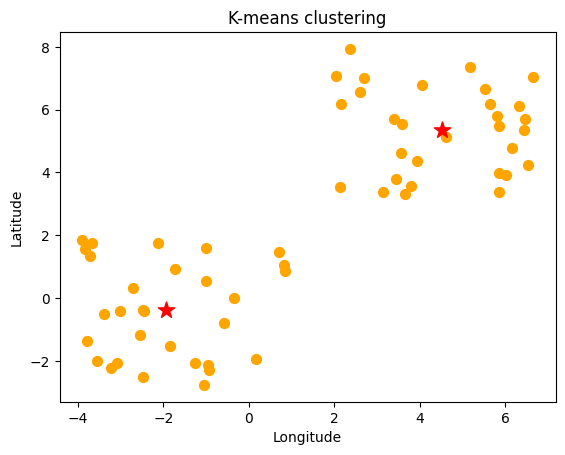

In [22]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)